_Use the following cell to collapse all code cells. To expand them, click on the following cell and select Menu -> Cell -> Current Outputs -> Clear_

In [ ]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('~/Development/python/Hillslope-Hydrology-and-Geomorphology/honors_thesis.mplstyle')

### Define parameters

The rest of the project will rely heavily on how the hillslope geometries are defined. We recommend the following parameters.

| Hill type | Ridge slope | Concavity |
| ------------- |-------------| -----|
| Convex  | -0.01 | -0.005 |
| Planar  | -0.51 | 0.0 |
| Concave | -1.01 | 0.005 |



In [147]:
ridgeSlope = -0.01 # m/m, initial slope/slope at ridge
concavity = -0.005 #m^-1, concavity/rate of change of slope, restrict 
hillLength = 100.0 # meters, horizontal extent of hillslope
ridgeElev = 50.0 #meters, elevation at ridge
dx = 1.0 # space step
xRes = int(hillLength/dx) #spatial resolution for modelling and plotting
kSat = 10**-3 #meters/sec, saturated hydraulic conductivity of the soil
precip = 0.01/3600 #m/sec, precipitation rate
drainage = -precip*0.1 #m/sec, drainage rate into underlying saprolite
stormLength = 3600.0*3 #sec, length of rain storm

# Variable quality checks
assert (ridgeSlope < 0), "You cannot route water upslope!"
if concavity < 0: print("Convex hillslope")
elif concavity == 0: print("Planar hillslope")
else: print("Concave hillslope")
assert (abs(ridgeSlope) <= 1.01), "Your hillslope is getting too steep"

Convex hillslope


### Plot hillslope

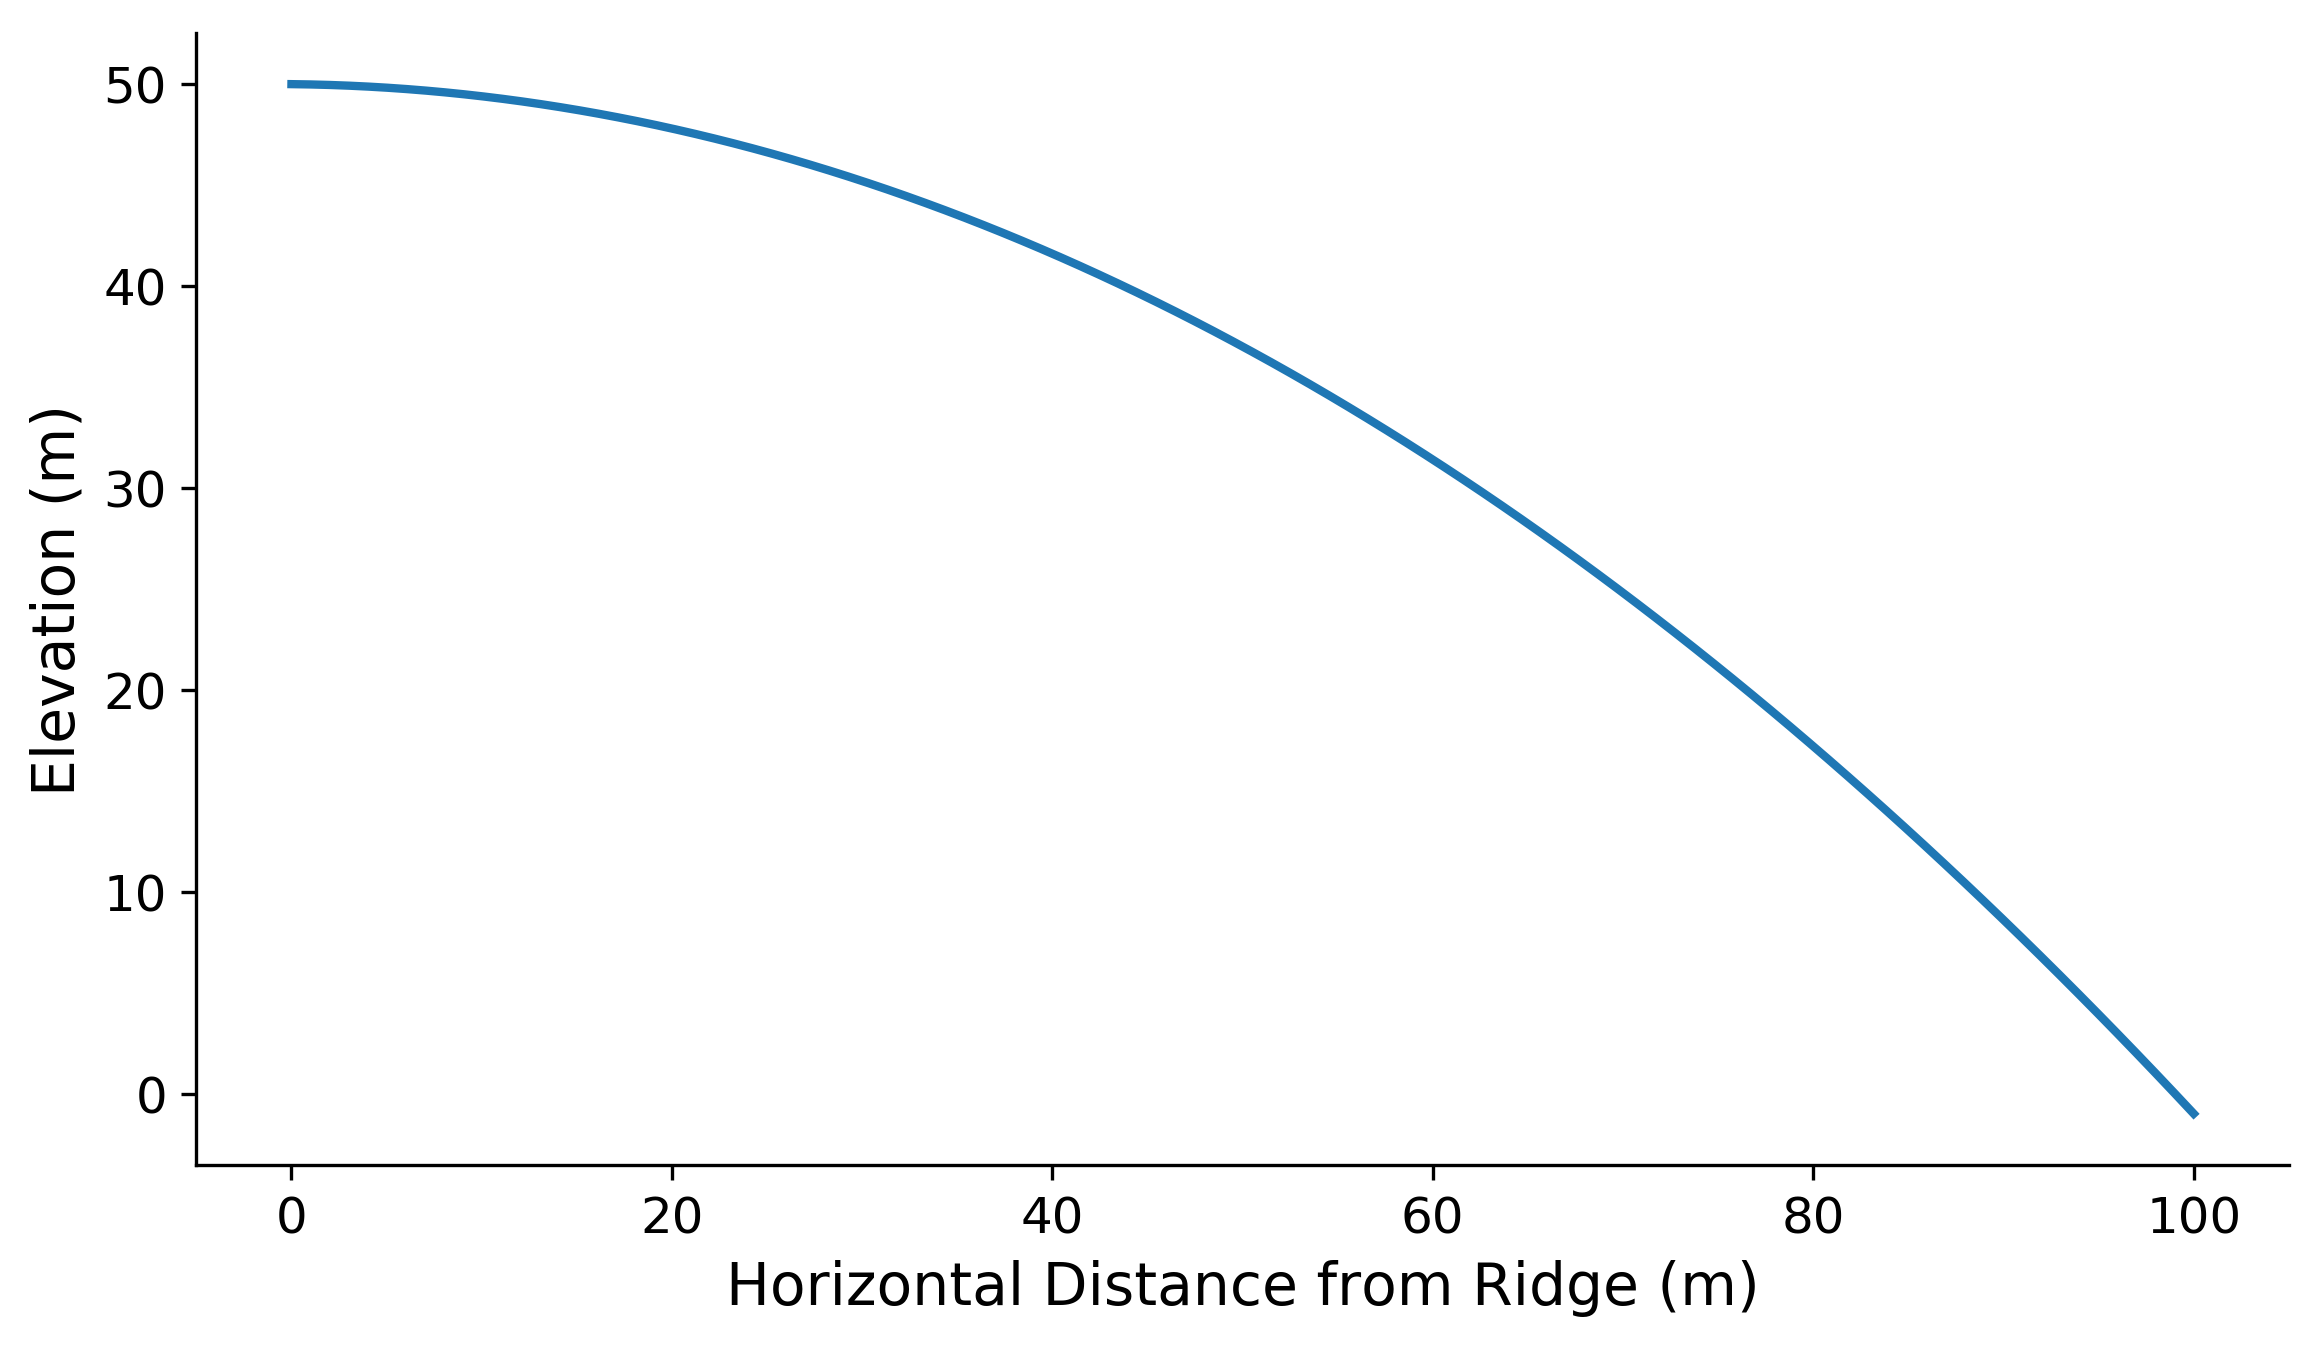

In [148]:
x = np.linspace(0,hillLength, xRes)
elevation = ridgeElev + ridgeSlope*x + concavity*x**2
elevationPlot = plt.plot(x, elevation)[0] # returns only 1 graph anyways
ax = elevationPlot.axes
ax.set_xlabel("Horizontal Distance from Ridge (m)");
ax.set_ylabel("Elevation (m)");

Try adjusting the `ridgeSlope` and `concavity`

### Plot plan shape

In addition to describing the profile of the hillslope, we must describe the plan shape of the hillslope. The plan shape determines whether the topography is convergent or divergent, which influences whether flow over the hillslope is convergent or divergent.

To keep the fluid dynamic equations simpler down the line, we will only describe the hillslope plan shape as linearly convergent or divergent. What we are essentially doing, mathematically, is bounding the flow of water at the edges our simulated section of hillslope. We ignore all lateral flow and assume that the height of the water surface above the impermeable surface over which it flows (descibed above with the parabolic equation) can be averaged over the hillslope section. 

A linear convergent or divergent hillslope section should have width that increases or decreases linearly downslope. We use a linear equation to relate hillslope width, $b$ and downslope distance, $x$,
<br><br>
\begin{equation}
    b = b_0 + c*x
\end{equation}

where $b_0$ is the width of the hill at the ridge ($x = 0$) and $c$ is the convergence rate, the constant rate of change of hillslope width. Because we want to keep the hillslope sections with different plan shapes of a constant surface area, we begin by defining the hillsope width at the midpoint, $b(x)$ where $x = L/2$, or $b_{mid}$.

For `hillLenth = 100`, we recommend the following parameter values for various hillslopes.

| Plane shape    | $b_{mid}$ | $c$    |
| -------------  |-------|-------|
| Convergent     |   20  | -0.2  |
| Divergent      |   20  |  0.2  | 
| Uniform        |   20  |  0.0  | 

To plot the plan shape of the hillslopes we plot the edges rather than the width.

Convergent hillslope


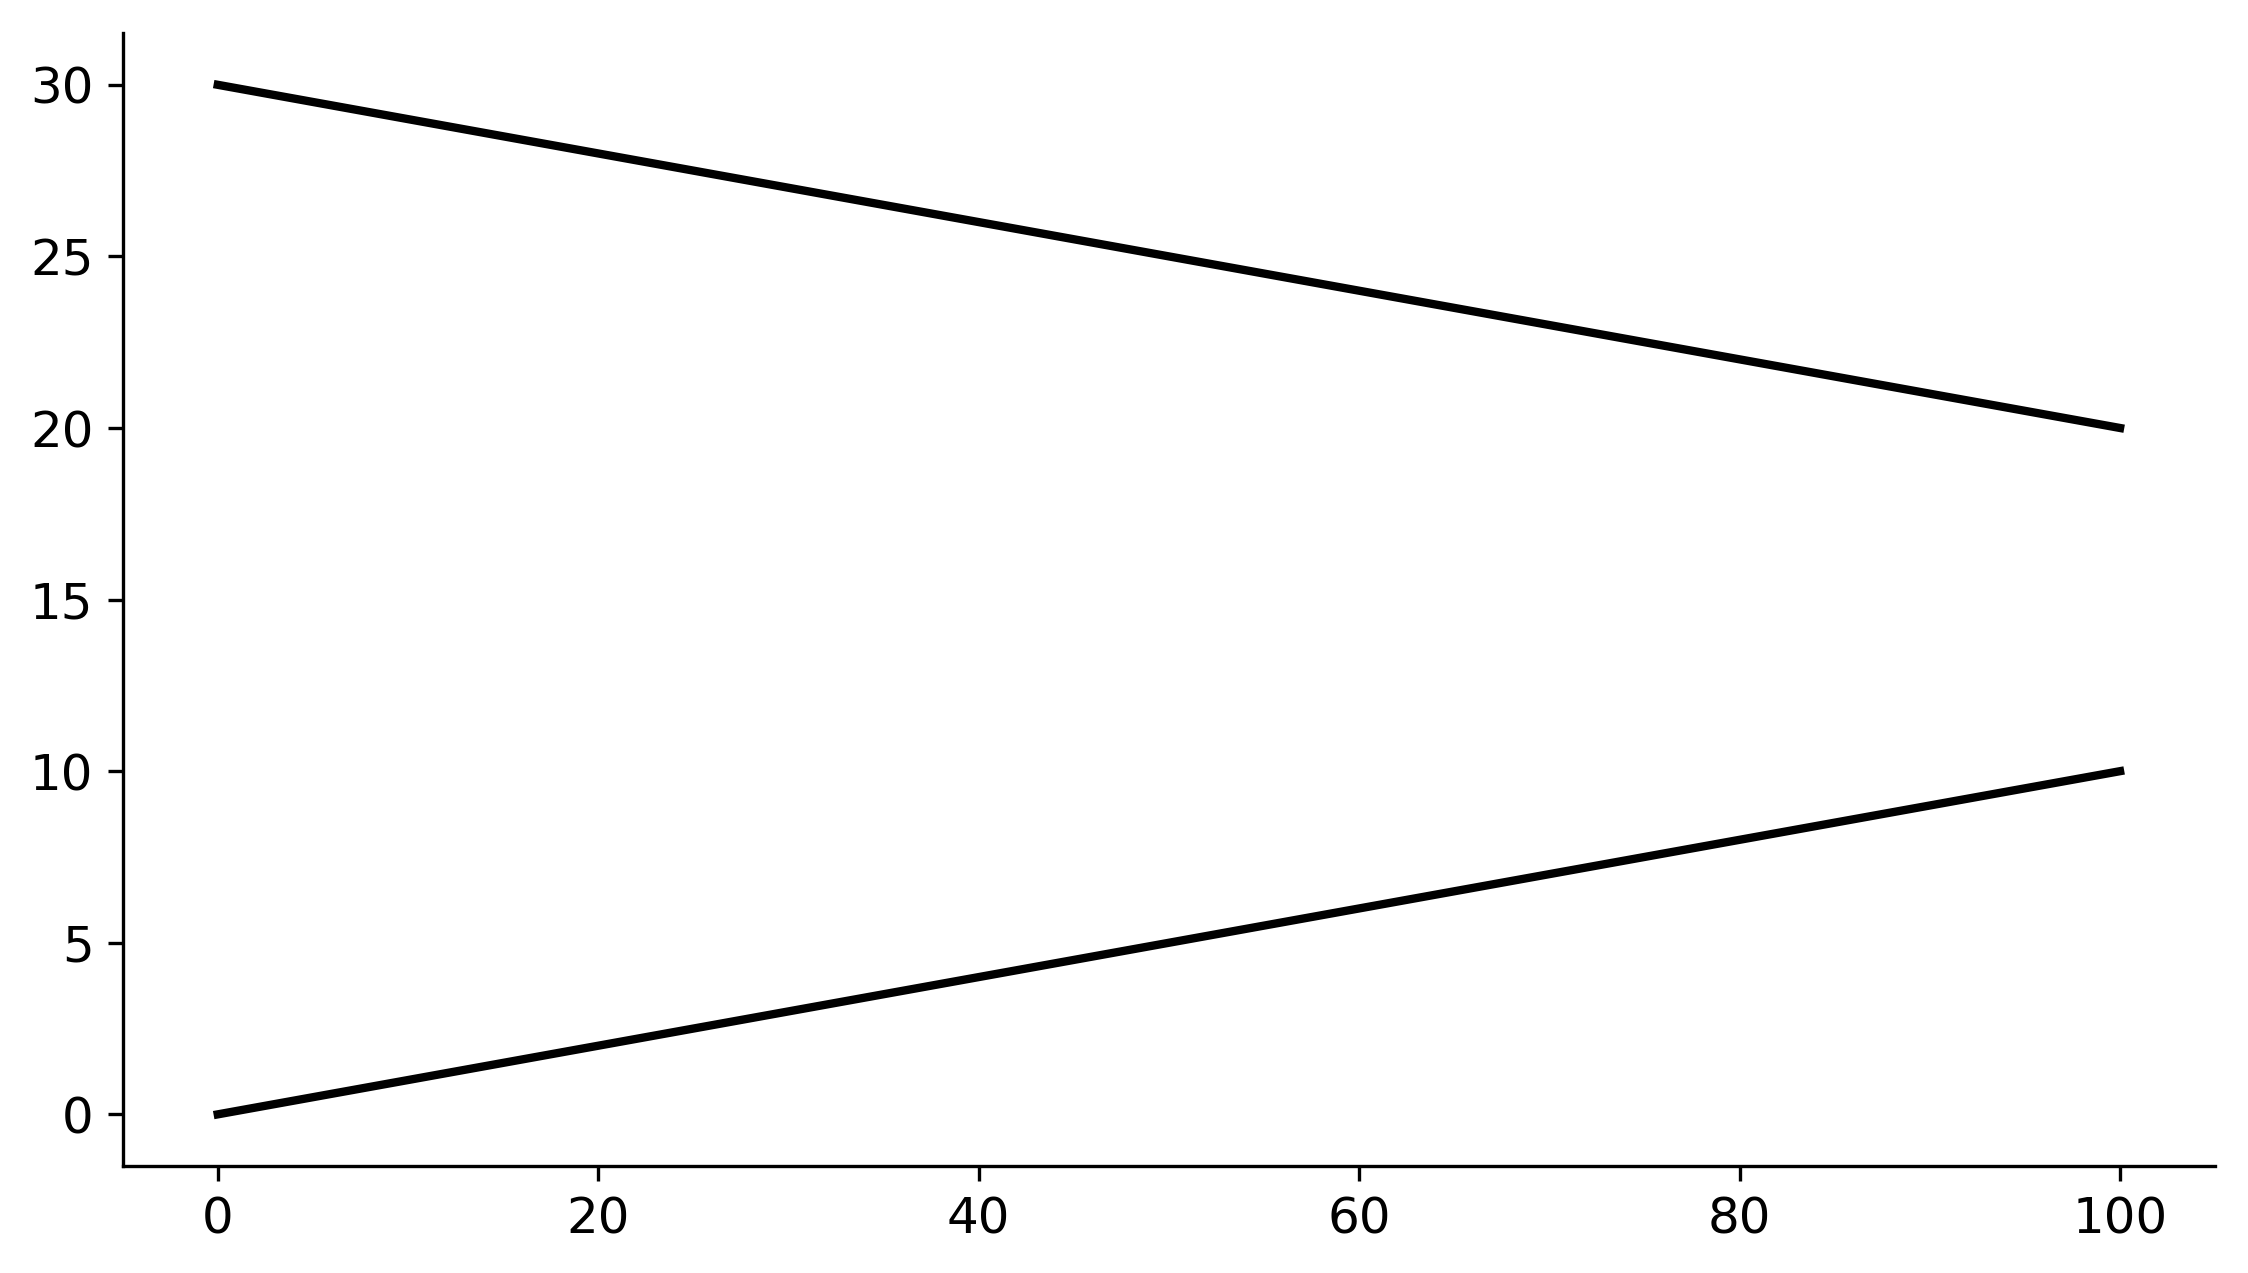

In [146]:
c = -0.2
bmid = 20

b0 = bmid - c*hillLength/2
bL = bmid + c*hillLength/2
w1 = 0.5*(bL - b0) - (c/2)*x + 10
w2 = (0.5*(bL - b0)+b0) + (c/2)*x + 10

plt.plot(x,w1, color = 'black');
plt.plot(x,w2, color = 'black');

if c < 0: print('Convergent hillslope')
elif c > 0: print('Divergent hillslope')
else: print('Uniform hillslope')